In [1]:
import matplotlib.pyplot as plt
import matplotlib.tri as tri
import matplotlib as mpl
import scipy.constants as cons
import pandas as pd
import numpy as np

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from qutip import *
from funcs import *
from scipy.optimize import curve_fit

mpl.rcParams.update({'font.size': 18})
mpl.rcParams.update({'font.family': 'sans-serif'})
mpl.rcParams['axes.labelpad'] = 16


def straightline(x, A, B):
    return A * x + B

In [2]:
%matplotlib inline

In [3]:
# Reading in data from file
# Numerical Cubic phase state data
cubicdf = pd.concat([pd.read_csv('data/cubic_good3.csv'),
                     pd.read_csv('data/cubic_good2.csv')], ignore_index=True)
cubicdf = cubicdf[cubicdf.nmean < 6.0].sort_values('nmean')

# analytic Cubic phase state data
anacubicdf = pd.concat([pd.read_csv('data/cubicanalytic_good3.csv'),
                        pd.read_csv('data/cubicanalytic_firstnewlimits.csv'),
                        pd.read_csv('data/cubicanalytic_2x2.csv')], ignore_index=True)
anacubicdf = anacubicdf[anacubicdf.nmean < 6.0].sort_values('nmean')

# Triple photon state data (inn is used as I previously called it the 'inner cubic' state, not updated as
# would need to ensure correctly replaced throughout and wont appear in final report anyway)
inncubicdf = pd.concat([pd.read_csv('data/inner_cubic_highdensity.csv'),
                        pd.read_csv('data/inner_cubic_nmeanregion.csv'),
                        pd.read_csv('data/inner_cubic.csv')], ignore_index=True)
inncubicdf = inncubicdf[inncubicdf.nmean < 6.0].sort_values('nmean')

## Numerical Cubic Parameter Plots

In [36]:
X = cubicdf.gamma
Y = cubicdf.r
Z = cubicdf.nmean

# Create triangluation objects to create triangulated surfaces and contours
test = tri.Triangulation(X, Y)

# Mask to make the triangles not try to jump too far (large gaps in the surface)
masktest = tri.TriAnalyzer(test).get_flat_tri_mask(
    min_circle_ratio=0.025, rescale=True)

test.set_mask(masktest)

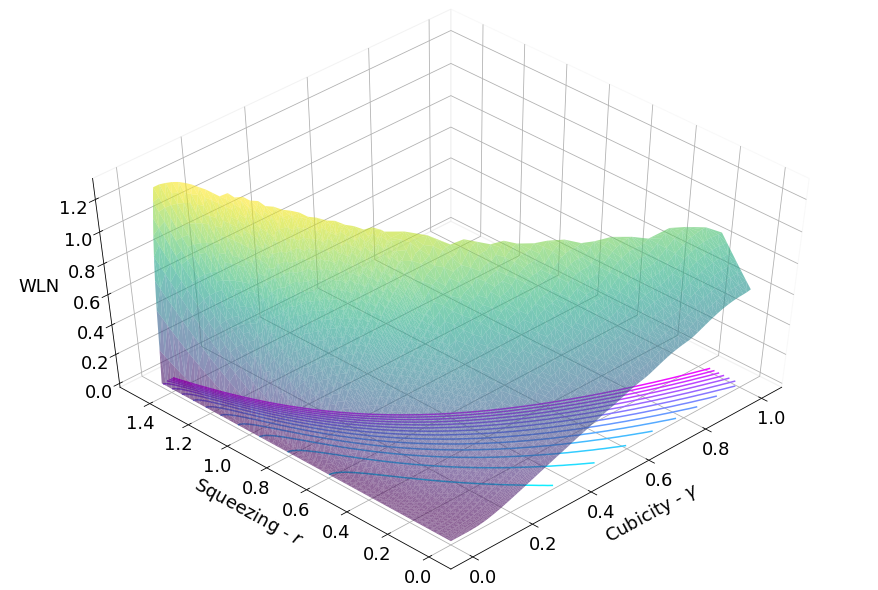

In [37]:
fig = plt.figure(figsize=(12, 8))
ax = Axes3D(fig)

Z2num = cubicdf.WLN

surf1num = ax.plot_trisurf(test, Z2num, alpha=0.6, cmap='viridis')

# Label Axes appropriately
ax.set_xlabel(r'Cubicity - $\gamma$')
ax.set_ylabel(r'Squeezing - $r$')
ax.set_zlabel(r'WLN')

# Remove background grid
# ax.grid(False)

# Remove background fill
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

# Make pane around each axes black, adds a border to plot
# ax.xaxis.pane.set_edgecolor('black')
# ax.yaxis.pane.set_edgecolor('black')
# ax.zaxis.pane.set_edgecolor('black')

# Sets the pane borders to be closed squares, by default only 3 sides
ax.xaxis.pane.set_closed(True)
ax.yaxis.pane.set_closed(True)
ax.zaxis.pane.set_closed(True)


#ax.contour(X, Y, Z, 10, zdir='x', offset=x0)
#ax.contour(X, Y, Z, 10, zdir='y', offset=y0)
contsnum = ax.tricontour(test, Z, zdir='z', offset=0, levels=14, cmap='cool')
ax.set_zlim(0, 1.3)
ax.view_init(50, 225)

# fig.colorbar(surf1num, shrink=0.5)
fig.savefig('fig/numcubic-parametersurf.pdf', format='pdf')

plt.show()

## Analytic Cubic parameter Plots

In [6]:
Xana = anacubicdf.gamma
Yana = anacubicdf.r
Zana = anacubicdf.nmean

# Create triangluation objects to create triangulated surfaces and contours
testana = tri.Triangulation(Xana, Yana)

masktestana = tri.TriAnalyzer(testana).get_flat_tri_mask(
    min_circle_ratio=0.04, rescale=True)

testana.set_mask(masktestana)

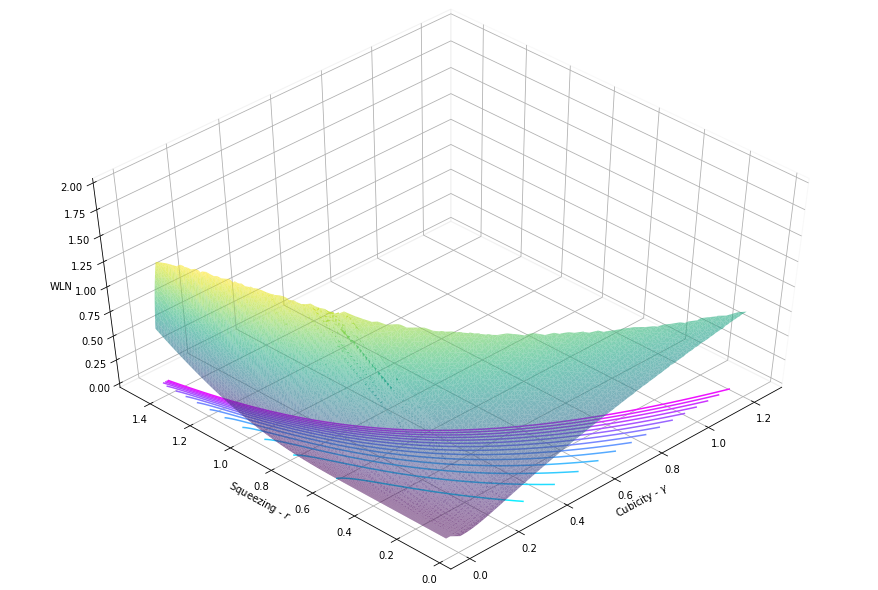

In [7]:
fig = plt.figure(figsize=(12, 8))
ax = Axes3D(fig)

Z2ana = anacubicdf.WLN

surf1ana = ax.plot_trisurf(testana, Z2ana, alpha=0.6, cmap='viridis')

# Label Axes appropriately
ax.set_xlabel(r'Cubicity - $\gamma$')
ax.set_ylabel(r'Squeezing - $r$')
ax.set_zlabel(r'WLN')

# Remove background grid
# ax.grid(False)

# Remove background fill
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

# Make pane around each axes black, adds a border to plot
# ax.xaxis.pane.set_edgecolor('black')
# ax.yaxis.pane.set_edgecolor('black')
# ax.zaxis.pane.set_edgecolor('black')

# Sets the pane borders to be closed squares, by default only 3 sides
ax.xaxis.pane.set_closed(True)
ax.yaxis.pane.set_closed(True)
ax.zaxis.pane.set_closed(True)


#ax.contour(X, Y, Z, 10, zdir='x', offset=x0)
#ax.contour(X, Y, Z, 10, zdir='y', offset=y0)
contsana = ax.tricontour(testana, Zana, zdir='z',
                         offset=0, levels=15, cmap='cool')
ax.set_zlim(0, np.ceil(anacubicdf.WLN.max()))
ax.view_init(50, 225)

# fig.colorbar(surf1ana, shrink=0.5)
fig.savefig('fig/anacubic-parametersurf.pdf', format='pdf')

plt.show()

## Triple Photon State Parameter Plots

In [33]:
Xinn = inncubicdf.gamma
Yinn = inncubicdf.r
Zinn = inncubicdf.nmean

# Create triangluation objects to create triangulated surfaces and contours
testinn = tri.Triangulation(Xinn, Yinn)

# Mask to make the triangles not try to jump too far (large gaps in the surface)
masktestinn = tri.TriAnalyzer(testinn).get_flat_tri_mask(
    min_circle_ratio=0.04, rescale=True)

testinn.set_mask(masktestinn)

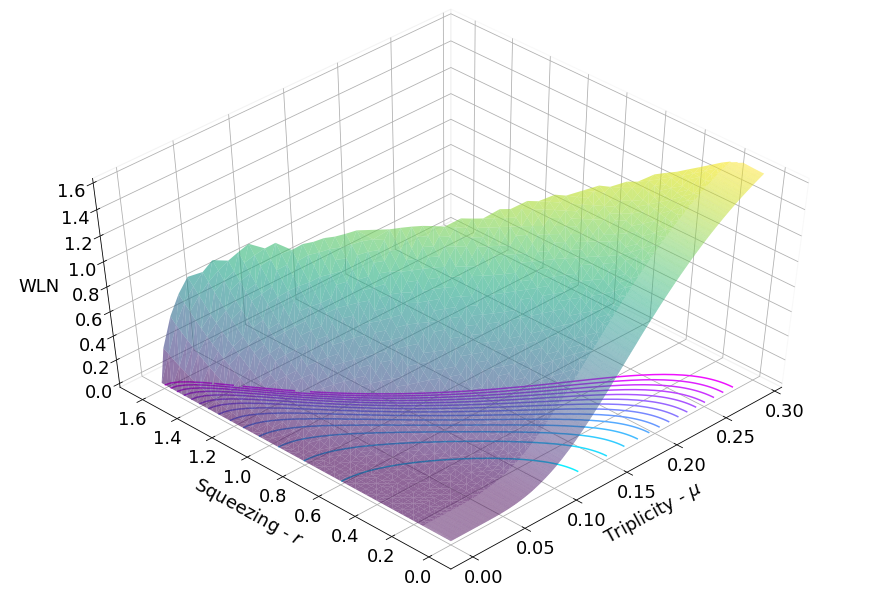

In [34]:
fig = plt.figure(figsize=(12, 8))
ax = Axes3D(fig)

Z2inn = inncubicdf.WLN

surf1inn = ax.plot_trisurf(testinn, Z2inn, alpha=0.6, cmap='viridis')

# Label Axes appropriately
ax.set_xlabel(r'Triplicity - $\mu$')
ax.set_ylabel(r'Squeezing - $r$')
ax.set_zlabel(r'WLN')

# Remove background grid
# ax.grid(False)

# Remove background fill
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

# Make pane around each axes black, adds a border to plot
# ax.xaxis.pane.set_edgecolor('black')
# ax.yaxis.pane.set_edgecolor('black')
# ax.zaxis.pane.set_edgecolor('black')

# Sets the pane borders to be closed squares, by default only 3 sides
ax.xaxis.pane.set_closed(True)
ax.yaxis.pane.set_closed(True)
ax.zaxis.pane.set_closed(True)


#ax.contour(X, Y, Z, 10, zdir='x', offset=x0)
#ax.contour(X, Y, Z, 10, zdir='y', offset=y0)
contsinn = ax.tricontour(testinn, Zinn, zdir='z',
                         offset=0, levels=15, cmap='cool')
ax.set_zlim(0, 1.6)
ax.view_init(50, 225)

# fig.colorbar(surf1inn, shrink=0.5)
fig.savefig('fig/tripphoton-parametersurf.pdf', format='pdf')

plt.show()

## Binning nmean data to find maximal WLN generating parameters

In [4]:
# Creating bins for nmean data
bins1 = np.linspace(cubicdf.nmean.min(), cubicdf.nmean.max(), 61)
bins2 = np.linspace(inncubicdf.nmean.min(), inncubicdf.nmean.max(), 61)
bins3 = np.linspace(anacubicdf.nmean.min(), anacubicdf.nmean.max(), 61)

cubicdf['nmeanbins'] = pd.cut(cubicdf.nmean, bins1, include_lowest=True)
inncubicdf['nmeanbins'] = pd.cut(inncubicdf.nmean, bins2, include_lowest=True)
anacubicdf['nmeanbins'] = pd.cut(anacubicdf.nmean, bins3, include_lowest=True)

In [5]:
# Obtain the maximum Mana in each nmean bin
maxWLNs1 = []
maxWLNs2 = []
maxWLNs3 = []

for bin in np.unique(cubicdf.nmeanbins):
    maxWLNs1.append(cubicdf[cubicdf.nmeanbins == bin].WLN.max())

for bin in np.unique(inncubicdf.nmeanbins):
    maxWLNs2.append(inncubicdf[inncubicdf.nmeanbins == bin].WLN.max())

for bin in np.unique(anacubicdf.nmeanbins):
    maxWLNs3.append(anacubicdf[anacubicdf.nmeanbins == bin].WLN.max())

# Define new dataframes as those with gamma, r coords corresponding to max Mana in nmeanbins
cubicdfmax = cubicdf[cubicdf.WLN.isin(maxWLNs1)]
# cubicdfmax = cubicdfmax[cubicdfmax.nmean > 0.15]
inncubicdfmax = inncubicdf[inncubicdf.WLN.isin(maxWLNs2)]
anacubicdfmax = anacubicdf[anacubicdf.WLN.isin(maxWLNs3)]

In [6]:
# Generate Mana Data for Fock states to compare
fnmeans = []
fWLNs = []
N = 10
for i in range(0, 7):
    fockstate = fock(N, i)
    fnmeans.append(expect(num(N), fockstate))
    fWLNs.append(wln(fockstate, 1e-5)[0])

In [7]:
# datafile = 'triple_photon_max_data.csv'
# with open(datafile, 'a') as f:
#             inncubicdfmax.to_csv(f, index=False)

# datafile = 'cubic_max_data.csv'
# with open(datafile, 'a') as f:
#             cubicdfmax.to_csv(f, index=False)

## Final Plot

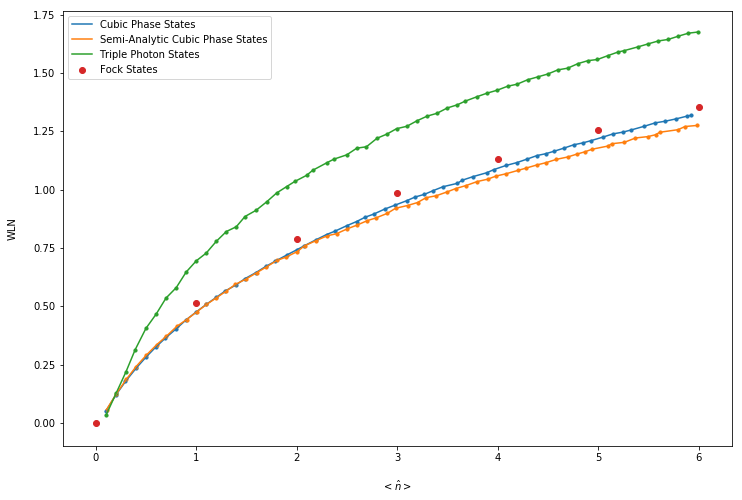

In [8]:
# Plot nmean agains max Mana
fig = plt.figure(figsize=[12, 8])
ax = plt.axes()
ax.plot(cubicdfmax.nmean, cubicdfmax.WLN, label='Cubic Phase States')
ax.scatter(cubicdfmax.nmean, cubicdfmax.WLN, label='_Cubic Phase State', s=10)

ax.plot(anacubicdfmax.nmean, anacubicdfmax.WLN,
        label='Semi-Analytic Cubic Phase States')
ax.scatter(anacubicdfmax.nmean, anacubicdfmax.WLN,
           label='_ana Cubic Phase States', s=10)

ax.plot(inncubicdfmax.nmean, inncubicdfmax.WLN, label='Triple Photon States')
ax.scatter(inncubicdfmax.nmean, inncubicdfmax.WLN,
           label='_Triple Photon State', s=10)

ax.scatter(fnmeans, fWLNs, label='Fock States')

# ax.set_title('''Maximal Value of the Wigner Logarithmic Negativity (WLN) against the mean value of the number
# operator for the triple photon state and cubic phase state''')
ax.set_xlabel(r'$<\hat{n}>$')
ax.set_ylabel('WLN')
ax.legend()


fig.savefig('fig/WLN-fixed_n.pdf', format='pdf')

plt.show()

# Additional plots
## 2d Parameter space plots with maximal WLN points marked

In [15]:
# Calculate least squares fit to the Max Mana data
[A1, B1], pcov1 = curve_fit(straightline, cubicdfmax.gamma, cubicdfmax.r)
perr1 = np.sqrt(np.diag(pcov1))

[A2, B2], pcov2 = curve_fit(straightline, inncubicdfmax.gamma, inncubicdfmax.r)
perr2 = np.sqrt(np.diag(pcov2))

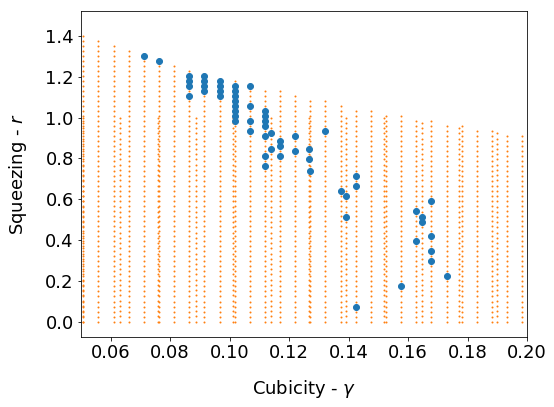

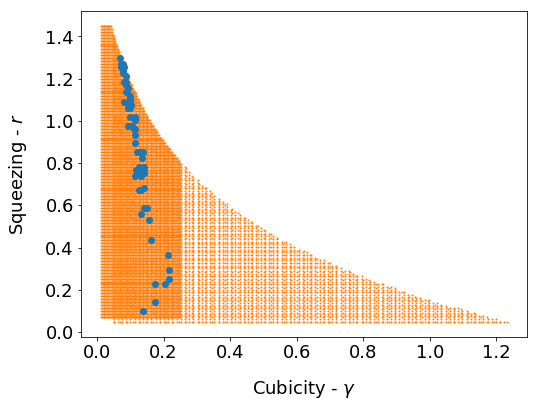

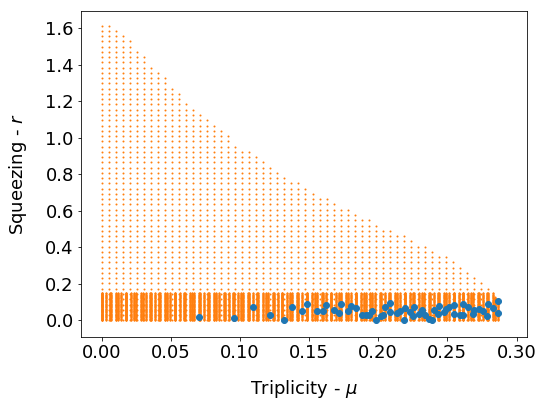

In [54]:
# Plot Points at which we find the maximum Mana for constant nmean for each state

fig = plt.figure(figsize=(8, 6))
ax = plt.axes()
# ax.set_title('Cubic Phase State')
ax.set_xlabel(r'Cubicity - $\gamma$')
ax.set_ylabel(r'Squeezing - $r$')
# Lines
# plt.plot(cubicdfmax.gamma, straightline(cubicdfmax.gamma, A1, B1))
# plt.plot(cubicdfmax.gamma, straightline(cubicdfmax.gamma, A1 + perr1[0], B1 + perr1[1]))
# plt.plot(cubicdfmax.gamma, straightline(cubicdfmax.gamma, A1 - perr1[0], B1 - perr1[1]))
# Scatters
plt.scatter(cubicdfmax.gamma, cubicdfmax.r, zorder=1)
plt.scatter(cubicdf.gamma, cubicdf.r, s=1, zorder=0)
ax.set_xlim(0.05, 0.2)
fig.savefig('fig/cubicphase-2dparameterplot-zoomed.pdf', bbox_inches="tight")
# fig.savefig('fig/cubicphase-2dparameterplot-full.pdf', bbox_inches = "tight")
plt.show()

fig = plt.figure(figsize=(8, 6))
ax = plt.axes()
# ax.set_title('Cubic Phase State')
ax.set_xlabel(r'Cubicity - $\gamma$')
ax.set_ylabel(r'Squeezing - $r$')
# Lines
# plt.plot(cubicdfmax.gamma, straightline(cubicdfmax.gamma, A1, B1))
# plt.plot(cubicdfmax.gamma, straightline(cubicdfmax.gamma, A1 + perr1[0], B1 + perr1[1]))
# plt.plot(cubicdfmax.gamma, straightline(cubicdfmax.gamma, A1 - perr1[0], B1 - perr1[1]))
# Scatters
plt.scatter(anacubicdfmax.gamma, anacubicdfmax.r, zorder=1)
plt.scatter(anacubicdf.gamma, anacubicdf.r, s=1, zorder=0)
# ax.set_xlim(0.05,0.2)
# fig.savefig('fig/analytic_cubicphase-2dparameterplot-zoomed.pdf', bbox_inches = "tight")
fig.savefig('fig/analytic_cubicphase-2dparameterplot-full.pdf',
            bbox_inches="tight")
plt.show()

fig = plt.figure(figsize=(8, 6))
ax = plt.axes()
# ax.set_title('Triple Photon State')
ax.set_xlabel(r'Triplicity - $\mu$')
ax.set_ylabel(r'Squeezing - $r$')
# Lines
# plt.plot(inncubicdfmax.gamma, straightline(inncubicdfmax.gamma, A2, B2))
# plt.plot(inncubicdfmax.gamma, straightline(inncubicdfmax.gamma, A2 + perr2[0], B2 + perr2[1]))
# plt.plot(inncubicdfmax.gamma, straightline(inncubicdfmax.gamma, A2 - perr2[0], B2 - perr2[1]))
# Scatters
plt.scatter(inncubicdfmax.gamma, inncubicdfmax.r, zorder=4)
plt.scatter(inncubicdf.gamma, inncubicdf.r, s=1)
# ax.set_ylim(-0.01, 0.12)
# fig.savefig('fig/triplephoton-2dparameterplot-zoomed.pdf', bbox_inches = "tight")
fig.savefig('fig/triplephoton-2dparameterplot-full.pdf', bbox_inches="tight")
plt.show()

## 3d Scatter plots of the previous

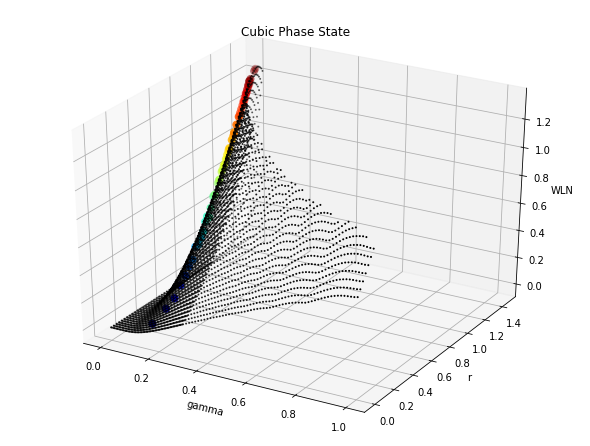

In [17]:
# Same as above but 3d scatters

fig, ax = my3dscatter(cubicdfmax.gamma, cubicdfmax.r,
                      cubicdfmax.WLN, 'Cubic Phase State', ['gamma', 'r', 'WLN'])

ax.scatter(cubicdfmax.gamma, cubicdfmax.r, cubicdfmax.WLN,
           s=50, c=cubicdfmax.WLN, cmap=cm.jet)

ax.scatter(cubicdf.gamma, cubicdf.r, cubicdf.WLN, s=1, c='black')

plt.show()

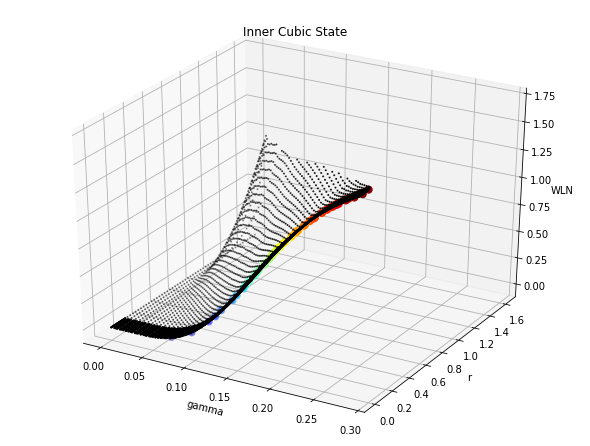

In [18]:
fig, ax = my3dscatter(inncubicdfmax.gamma, inncubicdfmax.r, inncubicdfmax.WLN,
                      'Inner Cubic State', ['gamma', 'r', 'WLN'])

ax.scatter(inncubicdfmax.gamma, inncubicdfmax.r, inncubicdfmax.WLN,
           s=50, c=inncubicdfmax.WLN, cmap=cm.jet)

ax.scatter(inncubicdf.gamma, inncubicdf.r, inncubicdf.WLN, s=1, c='black')

plt.show()